In [1]:
import numpy.testing as nt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy.linalg as LA

In [4]:
import os

In [6]:
from scipy.io import loadmat
output = loadmat(os.path.join('..','tsnmf','data','output.mat'))

In [8]:
# testing no sparsity, no smoothnes, 1 iteration
import tsnmf
model = tsnmf.smoothNMF(n_components=5, max_iter=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

print(LA.norm(output['V'] - (model.W@model.H)))

Stopping at iteration set in max_iter.
97.55296778898249


In [9]:
# testing the initial distance
nt.assert_almost_equal(LA.norm(output['V'] - (output['init_W']@output['init_H'])),213.432630275)

In [10]:
# compare cost after 1 iteration
nt.assert_almost_equal(model.cost, 9516.581524438)

In [11]:
# testing no sparsity, no smoothness, 200 iterations
import tsnmf
model = tsnmf.smoothNMF(r=5, max_iter=200, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],3636.162716116)

TypeError: __init__() got an unexpected keyword argument 'r'

In [14]:
# testing sparsity, 1 iteration
import tsnmf
model = tsnmf.smoothNMF(n_components=5, max_iter=1, sparsity=1, smoothness=0, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],4750.738752595)

Stopping at iteration set in max_iter.


In [16]:
# testing smoothness, 1 iteration
import tsnmf
model = tsnmf.smoothNMF(n_components=5, max_iter=1, sparsity=0, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')


print(LA.norm(model.W))
print(LA.norm(model.H))

nt.assert_almost_equal(LA.norm(model.W),4.7809,decimal=4)
nt.assert_almost_equal(LA.norm(model.H),39.6015,decimal=4)
nt.assert_almost_equal(model.cost[-1],6667.921143908)

Stopping at iteration set in max_iter.
4.7809444158146635
39.60155523767054


In [18]:
# testing sparsity and smoothness, 1 iteration
model = tsnmf.smoothNMF(n_components=5, max_iter=1, sparsity=1, smoothness=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],6715.167611171)


Stopping at iteration set in max_iter.


In [19]:
# testing sparsity and smoothness, 200 iterations
import tsnmf
model = tsnmf.smoothNMF(n_components=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

nt.assert_almost_equal(model.cost[-1],3909.6946, decimal=4)

Stopping at iteration set in max_iter.


In [20]:
# testing sparsity and smoothness, 200 iterations
import ssnmf
model = ssnmf.smoothNMF(n_components=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.1, betaH=0.1)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

nt.assert_almost_equal(model.cost[-1],3893.69665, decimal=4)

**Testing on the sonar dataset.**

In [26]:
from scipy.io import loadmat
output = loadmat(os.path.join('..','tsnmf','data','sonar_output.mat'))

In [27]:
init_W = output['params_all']['init_W'][0,0]
init_H = output['params_all']['init_H'][0,0]
max_iter = output['params_all']['max_iter'][0,0]

Stopping at iteration set in max_iter.
2516.922817573135
CPU times: user 2.45 s, sys: 268 ms, total: 2.72 s
Wall time: 699 ms


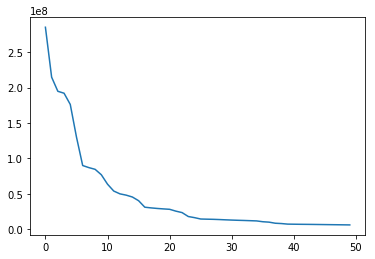

In [28]:
%%time
# testing no sparsity, no smoothnes, 1 iteration
import tsnmf
model = tsnmf.smoothNMF(n_components=3, max_iter=50, betaW=0, betaH=0)
model.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

In [29]:
W_reshaped = model.W.reshape(3, 144, 37, 3)

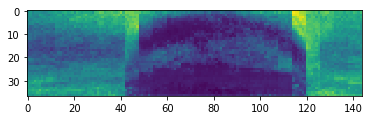

In [30]:
plt.imshow(W_reshaped[0,:,:,2].T)

In [31]:
# seems rank is 3 instead of 5 ???

In [32]:
output['params_all'][0]

array([(array([[3]], dtype=uint8), array([[50]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0.01]]), array([[0.81472369, 0.89638499, 0.9765793 ],
       [0.90579194, 0.82233698, 0.64965081],
       [0.12698682, 0.88278375, 0.94581752],
       ...,
       [0.74448884, 0.53463759, 0.12153136],
       [0.21285622, 0.70127087, 0.9951019 ],
       [0.10012246, 0.33829382, 0.32230971]]), array([[0.61255865, 0.52494092, 0.85378614, 0.57182458, 0.52551211,
        0.90362677, 0.14140459, 0.23764004, 0.33325914, 0.07234922,
        0.18453061, 0.88927026, 0.89008589, 0.77351042, 0.28932945,
        0.2436337 , 0.81959437, 0.35335566, 0.65919615, 0.87309013,
        0.69143526, 0.27778146, 0.50337604, 0.13789708, 0.72801385,
        0.32615465, 0.20726351, 0.46598106, 0.33208926, 0.20162799,
        0.72066244, 0.06452473, 0.52438631, 0.49361092, 0.43295562,
        0.66192381, 0.46155452, 0.99513164, 0.92982287, 0.78726828,
        0.12549798, 0.54263493, 0.0771

In [33]:
print(LA.norm(output['W'] - model.W))
print(LA.norm(output['H'] - model.H))

1.8443573037849867e-12
5.726232887563166e-14


In [34]:
# output['params_all']['max_iter'][0,0]

In [35]:
# display projection on first component

In [ ]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations
betaW = 1.001
betaH = 1.001
model = tsnmf.smoothNMF(n_components=3, max_iter=50, betaW=1.001, betaH=1.001)
model.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

Stopping at iteration set in max_iter.
2516.922817573135


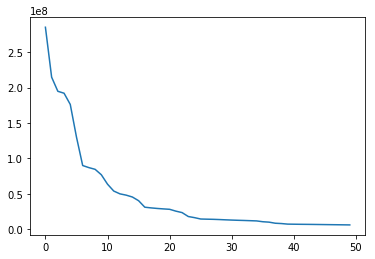

In [46]:
# testing 0.1 sparsity, 0.1 smoothnes, 1000 iterations
betaW = 1.001
betaH = 1.001
model_random = tsnmf.smoothNMF(n_components=3, max_iter=1000, betaW=1.001, betaH=1.001)
model_random.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

Stopping at iteration set in max_iter.
2516.922817573135


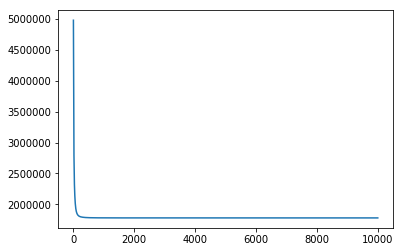

In [39]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvd = tsnmf.smoothNMF(n_components=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvd.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvd.cost)

Stopping at iteration set in max_iter.
2516.922817573135


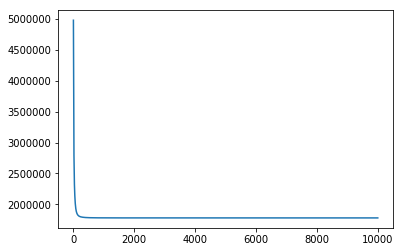

In [41]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvd = tsnmf.smoothNMF(n_components=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvd.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvd.cost)

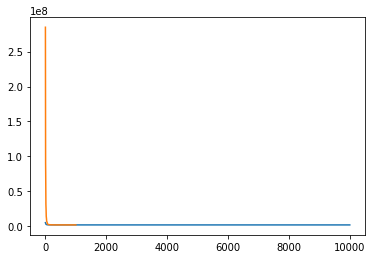

In [49]:
plt.plot(model_nndsvd.cost)
plt.plot(model_random.cost)

Stopping at iteration set in max_iter.
2516.922817573135


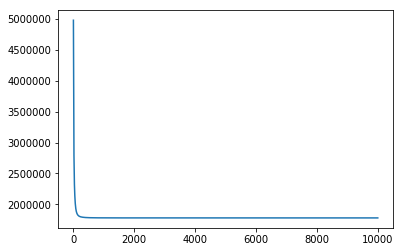

In [43]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvda = tsnmf.smoothNMF(n_components=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvda.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvda.cost)

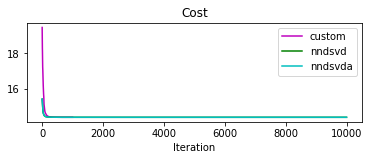

In [47]:
import numpy as np
plt.subplot(2, 1, 1)
plt.plot(np.log(model_random.cost), 'm')
plt.plot(np.log(model_nndsvd.cost), 'g')
plt.plot(np.log(model_nndsvda.cost), 'c')
plt.title('Cost')
plt.xlabel('Iteration')
plt.legend(['custom','nndsvd','nndsvda'])

In [48]:
print(model_random.cost[-1]/len(output['LL'].ravel()))
print(model_nndsvd.cost[-1]/len(output['LL'].ravel()))
print(model_nndsvda.cost[-1]/len(output['LL'].ravel()))


1.7996247547562652
1.7983025809972004
1.7983025809972004
